# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [4]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns


df = pd.read_csv("Glassdoor_Gender_Pay_Gap.csv")

In [9]:
df.head()


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [10]:
print(df.shape)

(1000, 9)


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

<Axes: >

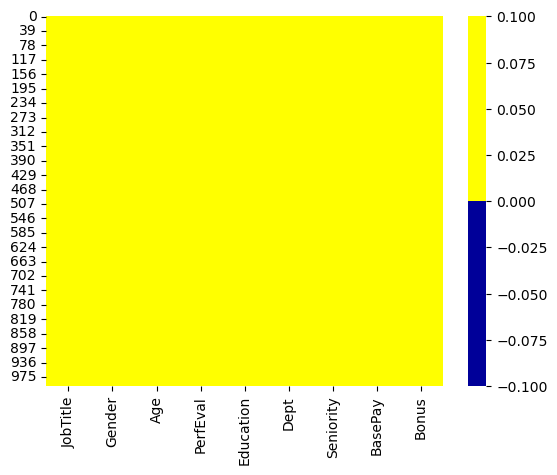

In [5]:
# Plot a heatmap of any missing data
cols = df.columns[:10]
colors = ['#000099', '#ffff00'] # specify the colours - blue is missing. yellow is not missing.

sns.heatmap(df[cols].isnull(),cmap = sns.color_palette(colors))

#There are no null values

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,9)))
    
#no data is missing

JobTitle - 0.0%
Gender - 0.0%
Age - 0.0%
PerfEval - 0.0%
Education - 0.0%
Dept - 0.0%
Seniority - 0.0%
BasePay - 0.0%
Bonus - 0.0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

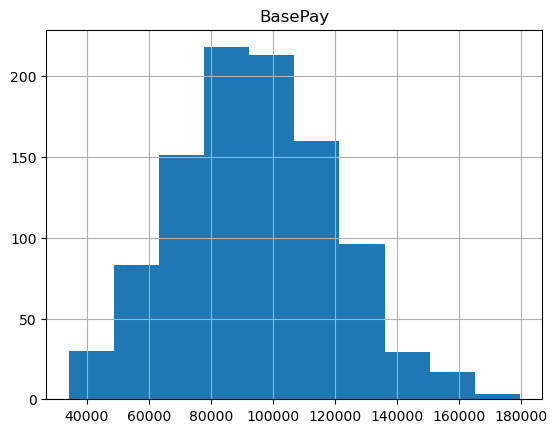

In [11]:
# Plotting a histogram to see if there are any outliers.
df.hist('BasePay')
plt.show()

In [15]:
df["BasePay"].describe()

count      1000.000000
mean      94472.653000
std       25337.493272
min       34208.000000
25%       76850.250000
50%       93327.500000
75%      111558.000000
max      179726.000000
Name: BasePay, dtype: float64

<Axes: >

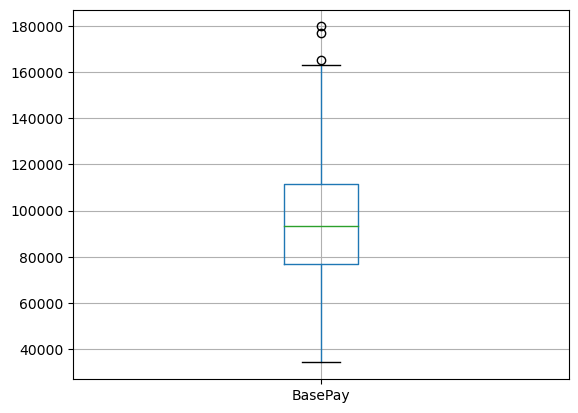

In [14]:
# box plot.
df.boxplot(column = ["BasePay"])
#seems like there may be a few outliers in basepay on the higher end. 

In [16]:
df.sort_values(['BasePay'], ascending= False)
#The top 3 values, ID 927,353,609 might be considered outliers. Quartile 4 ends at about 163000 and these 3 values are 
# greater than this. I would need to use the IQR Outlier formula to determine if they are outliers for sure. 
# Q1= 76850.25
# Q3= 111558.00
# IQR= 34707.75
# Outlier boundary factor= 1.5xIQR: 52061.625
# Lower Bound= Q1+Outlier factor    76850.25- 52061.625 = 24788.625 --> There are no BasePay's less than this value. No lower outliers
# Upper Bound= Q3+Outlier factor     111558.00 + 52061.625 = 163619.625 --> There are 3 BasePay's greateer that this value. 
# The top 3 salaries would be considered outliers. I will choose to leave these in for now since they are people with high
# education levels and high seniority. They might not be considered outliers within this consideration. 

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
927,Manager,Male,58,1,PhD,Management,4,179726,4284
353,Manager,Male,59,4,PhD,Sales,5,176789,6773
609,IT,Male,65,4,Masters,Sales,5,165229,6506
799,Manager,Male,55,1,High School,Management,5,163208,4095
357,Manager,Female,60,4,PhD,Management,3,160614,8354
...,...,...,...,...,...,...,...,...,...
590,Marketing Associate,Female,41,3,High School,Administration,2,36972,7058
949,Graphic Designer,Male,30,1,College,Operations,2,36642,4388
824,Marketing Associate,Female,26,1,High School,Management,1,36585,4373
348,Marketing Associate,Female,22,4,PhD,Operations,1,36548,8090


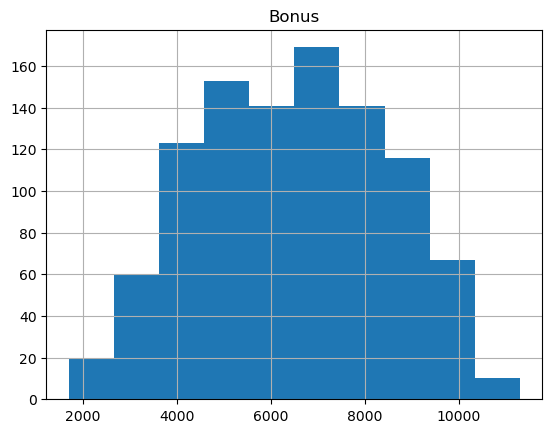

In [12]:
df.hist('Bonus')
plt.show()

<Axes: >

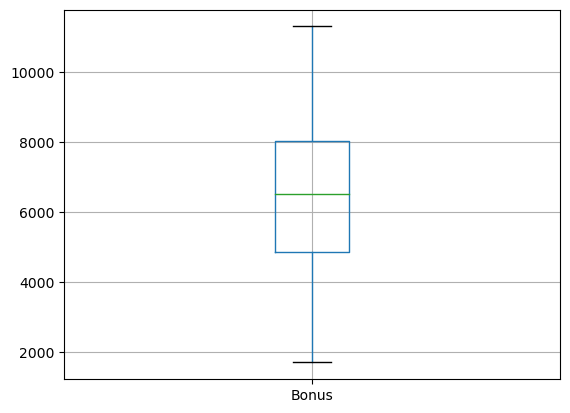

In [13]:
# box plot.
df.boxplot(column = ["Bonus"])

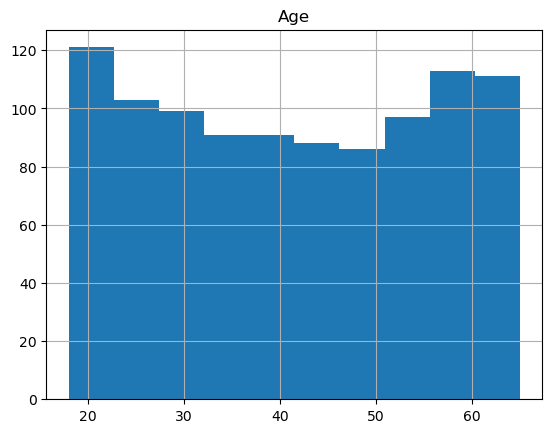

In [17]:
data.hist('Age')
plt.show()
#data is a normal U distribution

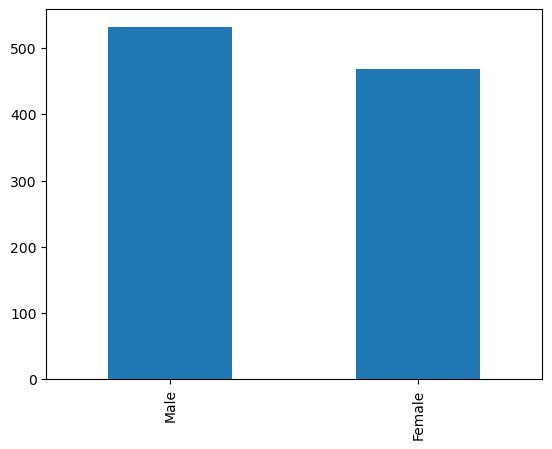

In [19]:
df['Gender'].value_counts().plot(kind='bar');
#data is close to a 50/50 split between men and women

<Axes: >

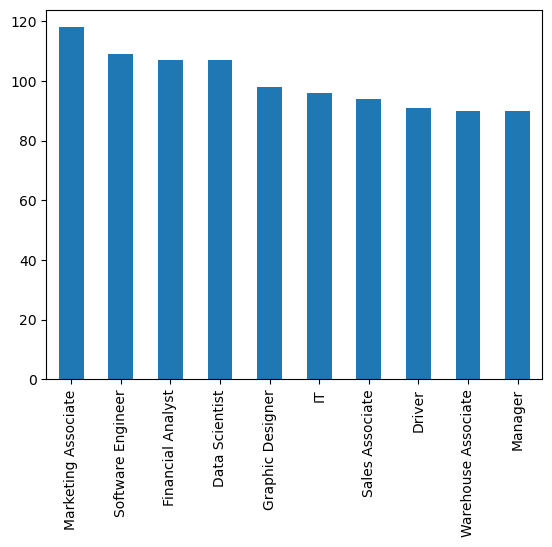

In [20]:
df['JobTitle'].value_counts().plot(kind='bar')
#relatively similar amound of people pulled per job title

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [21]:
#checking for duplicated data values
df_dupes = df[df.duplicated()]
df_dupes
#There are no duplicated data points

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [22]:
df.head(10)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
5,IT,Female,20,5,PhD,Operations,4,70890,10126
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836
9,Sales Associate,Female,35,5,College,Engineering,5,106524,9941


In [23]:
df["JobTitle"]= df["JobTitle"].str.lower()
df["Gender"]= df["Gender"].str.lower()
df["Education"]= df["Education"].str.lower()
df["Dept"]= df["Dept"].str.lower()
df.head()

#I could lowercase all string data values, but this does not enhance my analysis in any way, so I will not export my table like this.

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,graphic designer,female,18,5,college,operations,2,42363,9938
1,software engineer,male,21,5,college,management,5,108476,11128
2,warehouse associate,female,19,4,phd,administration,5,90208,9268
3,software engineer,male,20,5,masters,sales,4,108080,10154
4,graphic designer,male,26,5,masters,engineering,5,99464,9319


In [ ]:
# The data is pretty consistend. I thought about Changing the column headings to lowercase, but I think they are fine. 
# I also would like to keep them without spaces. The strings in the data values themselves are also consistent. 
# I am choosing to leave the data as is. 

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
    I tested/checked for all 4 but did not find issues in all 4 categories.
2. Did the process of cleaning your data give you new insights into your dataset?
    Yes, especially around the top 3 salaries.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    I will need to consider the top 3 basepay values being outliers when I am looking specifically at employees with a PhD education. I may also want to look at the basepay for all people that have a PhD and see if these values are still outliers. 